## **INCISO 2**

- #### **Análisis de las Variables**

In [93]:
#Importación de paquetes necesarios para el inciso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [94]:
# Lectura y análisis del Dataset
df1 = pd.read_csv('str_1.csv', delimiter=';')
df2 = pd.read_csv('str_2.csv', delimiter=';')

In [95]:
#Concatenamos los dataframes
df = pd.concat([df1, df2], ignore_index=True)

df_crudo = df

In [96]:
# Eliminamos la columna ID para trabajar de una mejor manera
df.drop('ID',axis=1, inplace=True)

In [97]:
#Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   protocol             9537 non-null   object 
 1   browser_type         9537 non-null   object 
 2   login_attempts       9409 non-null   float64
 3   duration             9537 non-null   float64
 4   packet_size          9537 non-null   int64  
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   unusual_time_access  9537 non-null   int64  
 9   attack               9537 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 745.2+ KB


In [99]:
df.head()

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [100]:
df.describe()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access
count,9409.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,4.029971,792.745312,500.430639,0.331338,1.517773,0.149942
std,1.962595,786.560144,198.379364,0.177175,1.033988,0.357034
min,1.000000,0.500000,64.000000,0.002497,0.000000,0.000000
25%,3.000000,231.953006,365.000000,0.191946,1.000000,0.000000
50%,4.000000,556.277457,499.000000,0.314778,1.000000,0.000000
75%,5.000000,1105.380602,635.000000,0.453388,2.000000,0.000000
max,13.000000,7190.392213,1285.000000,0.924299,5.000000,1.000000


In [101]:
#Contamos los valores faltantes por columna
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts          128
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

- #### **Valores Érroneos/Valores Faltantes**

In [102]:
df[pd.isnull(df.login_attempts)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
78,UDP,Chrome,NaN,195.410180,518,AES,0.447209,0,0,Y
97,TCP,Firefox,NaN,33.652804,552,AES,0.311972,0,0,N
126,TCP,Firefox,NaN,183.719758,301,AES,0.263931,2,0,N
132,TCP,Chrome,NaN,102.388924,287,NaN,0.063839,1,0,Y
155,TCP,Edge,NaN,72.910813,357,DES,0.199537,2,0,Y
...,...,...,...,...,...,...,...,...,...,...
9020,TCP,Edge,NaN,640.488738,537,DES,0.674310,3,0,Y
9021,UDP,Edge,NaN,1456.765115,821,AES,0.427167,1,1,N
9044,TCP,Firefox,NaN,22.106746,439,AES,0.809237,2,0,Y
9164,TCP,Unknown,NaN,898.844146,687,NaN,0.137867,0,0,N


In [103]:
df[pd.notnull(df.login_attempts)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N
...,...,...,...,...,...,...,...,...,...,...
9532,ICMP,Chrome,3.0,226.049889,194,AES,0.517737,3,0,Y
9533,TCP,Chrome,3.0,182.848475,380,NaN,0.408485,0,0,N
9534,TCP,Firefox,5.0,35.170248,664,AES,0.359200,1,0,N
9535,TCP,Chrome,4.0,86.664703,406,AES,0.537417,1,1,N


In [104]:
df[pd.isnull(df.encryption_used)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
8,TCP,Chrome,2.0,542.558895,406,NaN,0.294580,0,1,N
9,UDP,Chrome,6.0,531.944107,608,NaN,0.424117,1,0,N
12,TCP,Safari,2.0,186.147638,548,NaN,0.406899,2,1,N
14,TCP,Chrome,3.0,77.849952,155,NaN,0.352476,3,0,Y
17,UDP,Firefox,1.0,87.641002,562,NaN,0.136729,2,0,N
...,...,...,...,...,...,...,...,...,...,...
9516,TCP,Chrome,4.0,199.992299,869,NaN,0.574007,1,0,N
9529,TCP,Chrome,1.0,2487.078455,469,NaN,0.497153,0,0,N
9530,UDP,Chrome,5.0,1037.597568,661,NaN,0.613622,3,0,Y
9533,TCP,Chrome,3.0,182.848475,380,NaN,0.408485,0,0,N


In [105]:
df[pd.notnull(df.encryption_used)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N
...,...,...,...,...,...,...,...,...,...,...
9528,TCP,Edge,7.0,50.518476,535,DES,0.767659,1,1,Y
9531,TCP,Chrome,7.0,315.151758,746,DES,0.190059,3,0,Y
9532,ICMP,Chrome,3.0,226.049889,194,AES,0.517737,3,0,Y
9534,TCP,Firefox,5.0,35.170248,664,AES,0.359200,1,0,N


In [106]:
# Análisis de variables con faltas
print("\nValores únicos por variable con faltas:\n")
for col in ['encryption_used', 'login_attempts']:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))


Valores únicos por variable con faltas:


Columna: encryption_used
encryption_used
AES    4706
DES    2865
NaN    1966
Name: count, dtype: int64

Columna: login_attempts
login_attempts
3.0     1824
4.0     1821
5.0     1588
2.0     1342
6.0      947
1.0      859
7.0      562
8.0      264
NaN      128
9.0      122
10.0      45
11.0      22
12.0       8
13.0       5
Name: count, dtype: int64


In [107]:
# Limpieza de valores faltantes

# Imputar login_attempts con la media
df.loc[pd.isnull(df.login_attempts), 'login_attempts'] = df[pd.notnull(df.login_attempts)].login_attempts.median()

In [108]:
# Imputar encryption_used con la categoría 'Faltante'
df.loc[pd.isnull(df['encryption_used']), 'encryption_used'] = 'Faltante'

In [109]:
# Confirmar que ya no quedan valores faltantes
print("\nValores faltantes después de la imputación:\n")
df.isnull().sum()


Valores faltantes después de la imputación:



protocol               0
browser_type           0
login_attempts         0
duration               0
packet_size            0
encryption_used        0
ip_reputation_score    0
failed_logins          0
unusual_time_access    0
attack                 0
dtype: int64

- #### **Valores atípicos**

<Axes: >

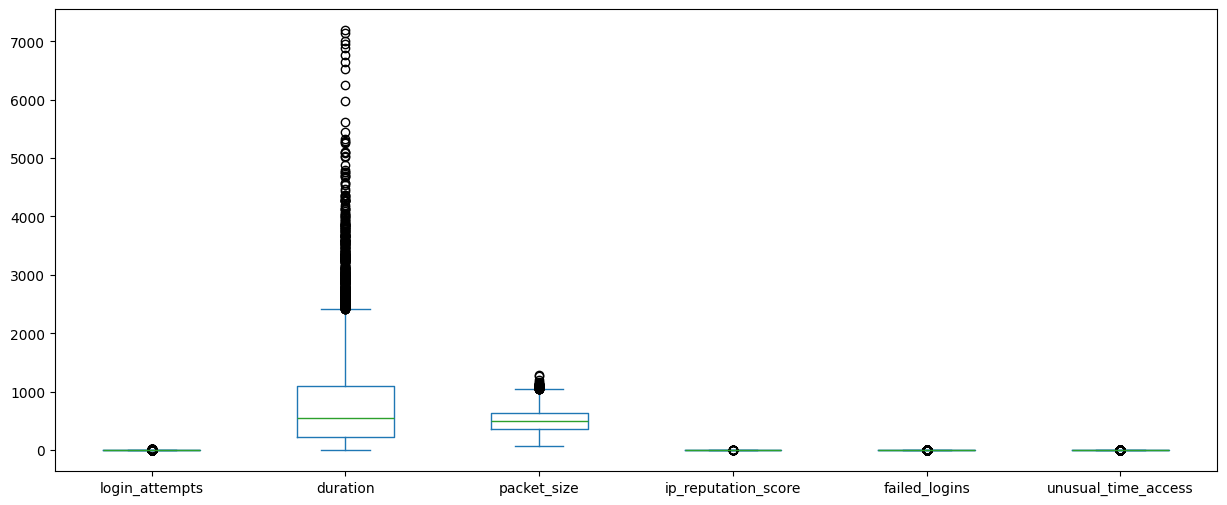

In [110]:
## Boxplot para visualizar valores atípicos
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
df.plot(kind='box', ax=ax)

#df[['login_attempts', 'ip_reputation_score', 'failed_logins']].plot(kind='box', ax=ax)

In [65]:
## Ver que podemos hacer acá, para mi los intentos de login y fallos de login no son variables atípicas a tratar, el hoario inusual mucho menos
## es binario encima, duration, tamaño de paquete podría tratarse, confiabilidad del ip no porq los valores atípicos son representativos
## Consultar bien esto

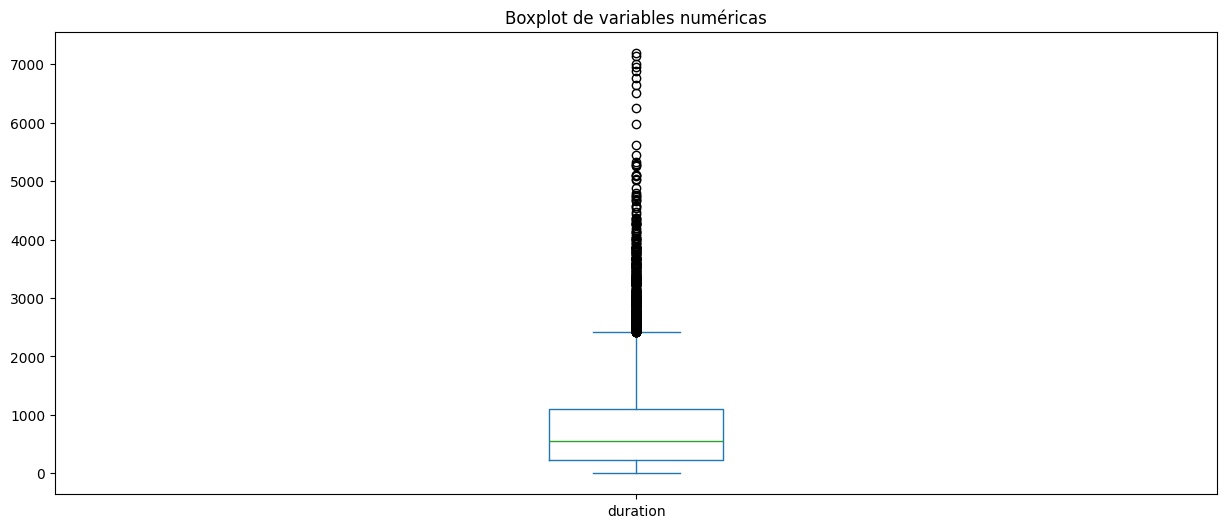

In [111]:
## Visualizamos nuevamente los Boxplots
fig, ax = plt.subplots(figsize=(15,6))
#df.plot(kind='box', ax=ax)

df[['duration']].plot(kind='box', ax=ax)
plt.title("Boxplot de variables numéricas")
plt.show()

- #### **Correlación entre variables**

In [112]:
# Calculamos la matriz de correlación absoluta
corr = df.corr(numeric_only=True).abs()

In [113]:
# Calculamos un vector con las medias de cada columna
column_mean = corr.mean(axis=1)

In [114]:
column_mean

login_attempts         0.172635
duration               0.177916
packet_size            0.173034
ip_reputation_score    0.171507
failed_logins          0.177877
unusual_time_access    0.172026
dtype: float64

In [115]:
corr

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access
login_attempts,1.000000,0.008463,0.001300,0.002887,0.014464,0.008696
duration,0.008463,1.000000,0.021650,0.005077,0.019375,0.012930
packet_size,0.001300,0.021650,1.000000,0.002320,0.011676,0.001255
ip_reputation_score,0.002887,0.005077,0.002320,1.000000,0.015613,0.003146
failed_logins,0.014464,0.019375,0.011676,0.015613,1.000000,0.006131
unusual_time_access,0.008696,0.012930,0.001255,0.003146,0.006131,1.000000


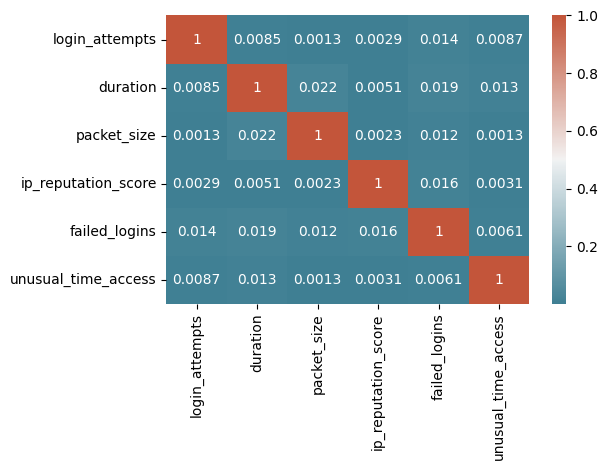

In [71]:
# Visualizamos la matriz de correlación
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()

In [116]:
# Calculo de las correlaciones de las columnas dado un umbral
umbral = 0.70
variables = corr.columns

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        if corr.iloc[i, j] > umbral:
            print(f"La variable '{variables[i]}' está altamente correlacionada con '{variables[j]}'")
            if column_mean[variables[i]] > column_mean[variables[j]]:
                print(f"Se recomienda eliminar: '{variables[i]}'")
            else:
                print(f"Se recomienda eliminar: '{variables[j]}'")

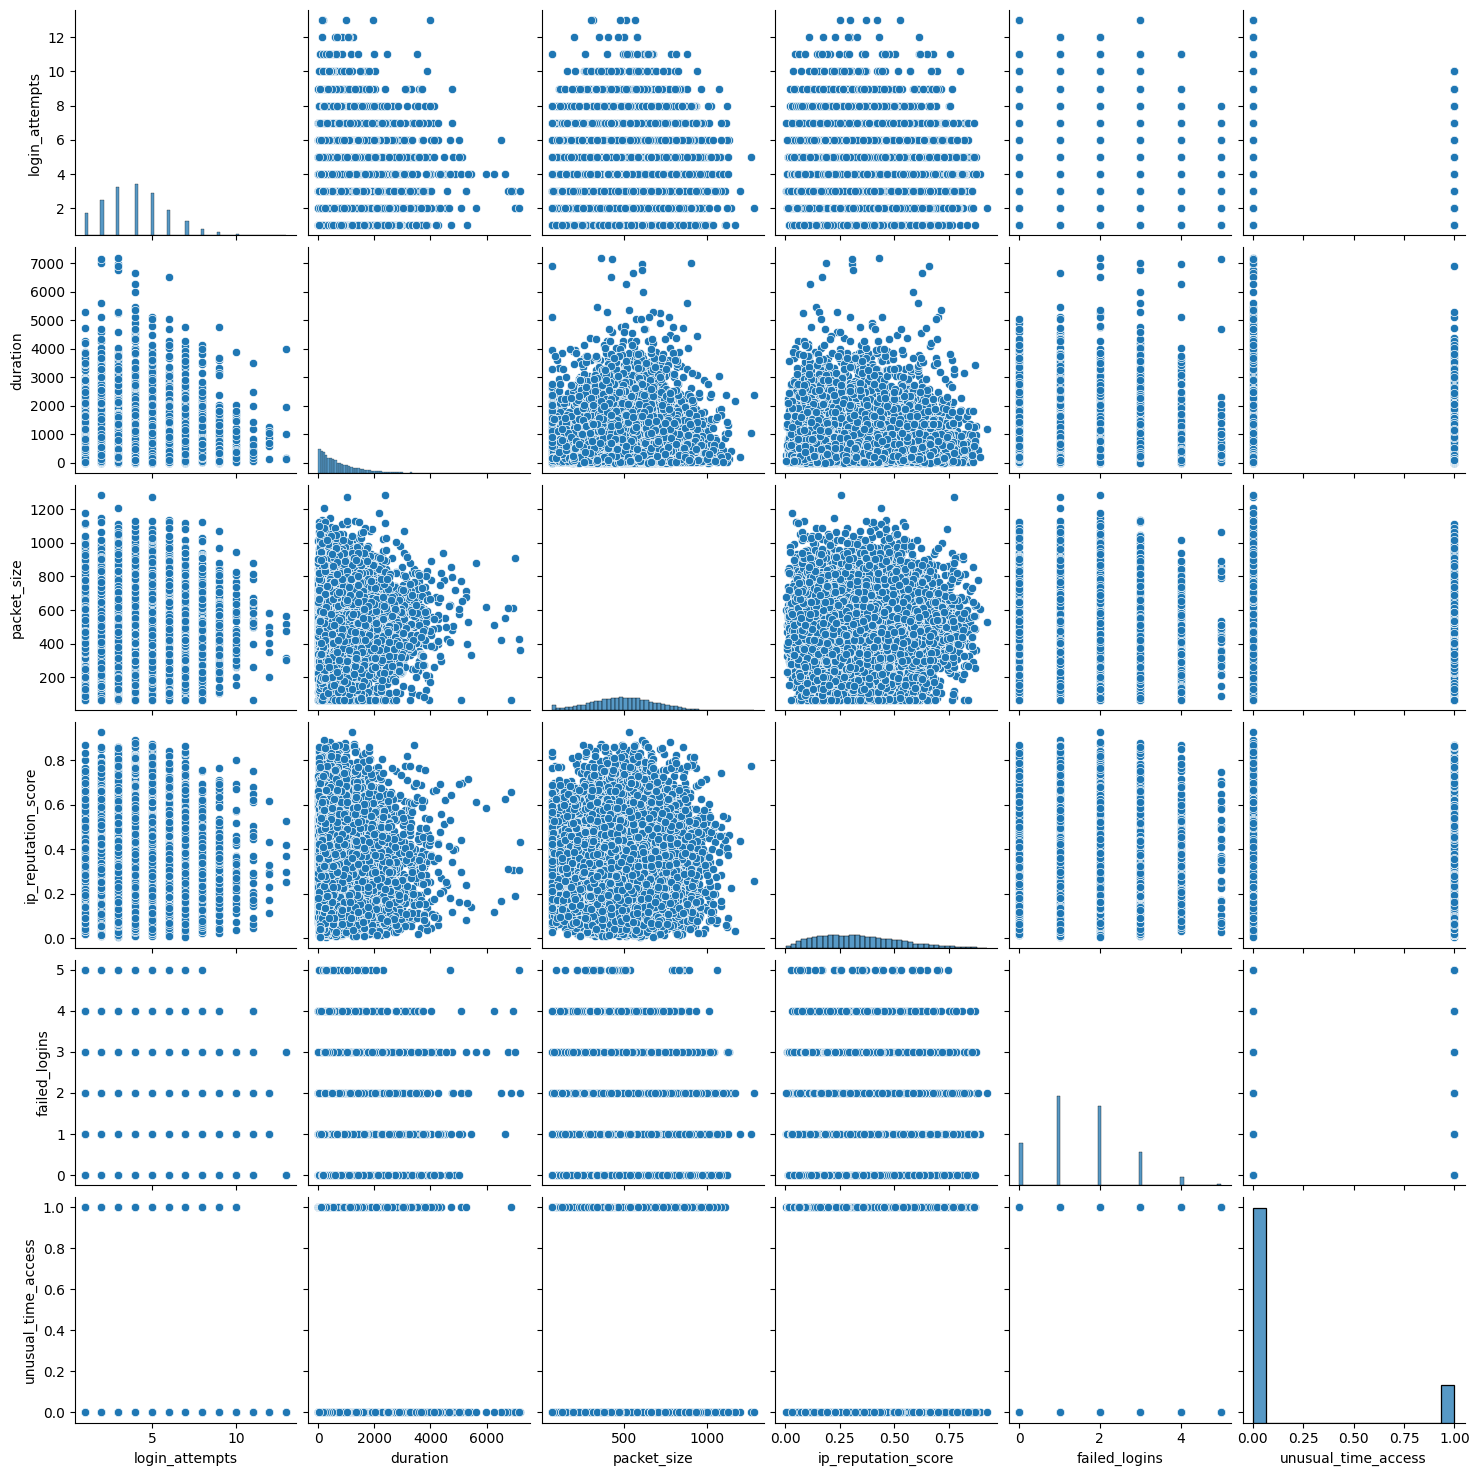

In [27]:
# esto está de adorno, sirve para ver de otra manera la correlación entre variables numéricas
sns.pairplot(df)

- #### **Procesamiento de variables categóricas.**

In [117]:
## Aplicacion de la codificacion One-Hot a las variables categoricas nominales

df = pd.get_dummies(df, columns=['protocol', 'browser_type'], dtype=int)

In [118]:
df = pd.get_dummies(df, columns=['encryption_used', 'unusual_time_access'], dtype=int)

In [119]:
for attack in df['attack']:
    print(attack, type(attack))

Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class

In [120]:
df['attack'] = df['attack'].map({'Y': 1, 'N': 0})

- #### **Balance del conjunto de datos.**

In [ ]:
## Nos guradamos las etiquetas en un vector auxiliar
attack = df['attack']

## Aplicamos el over_sampling de los datos

df, attack = SMOTE().fit_resample(df, attack)


In [125]:
len(attack)

10546

- #### **Normalización del conjunto de datos.**

In [29]:
# Selección de variables numéricas
num_cols = ['login_attempts', 'duration', 'packet_size', 'ip_reputation_score', 'failed_logins']

# Filtramos los datos
data_numeric = df[num_cols]

In [30]:
# Calculamos la media y desviación estándar
means = data_numeric.mean()
stds = data_numeric.std()

In [31]:
# Aplicamos la normalización Z-score
data_scaled = (data_numeric - means) / stds

In [32]:
# Reemplazamos en el DataFrame original
df_scaled = df.copy()
df_scaled[num_cols] = data_scaled